CSV file saved to: data/GSE14520_cleaned_scaled.csv


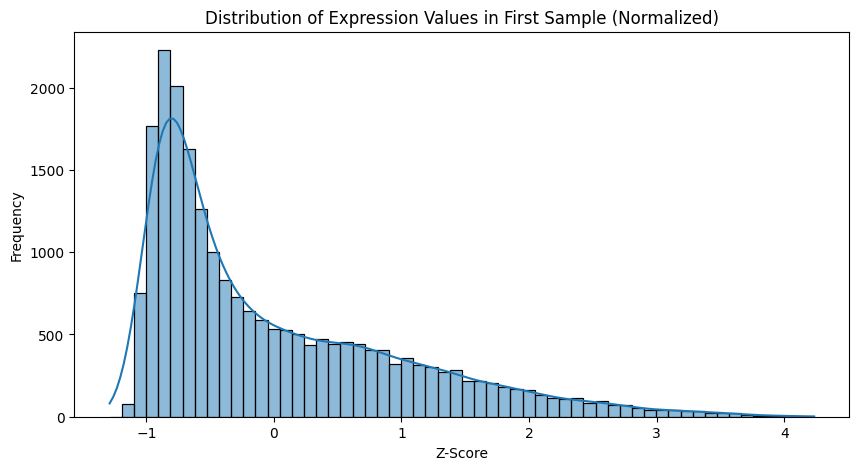

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load expression-only file (you already cleaned this!)
file_path = 'data/GSE14520-GPL3921_expression_only.txt'
data = pd.read_csv(file_path, sep='\t', header=0)  # Adjust header=0 to ensure headers are correctly loaded

# Step 2: Separate gene IDs and expression matrix
gene_ids = data.iloc[:, 0]  # First column = gene IDs
expression_values = data.iloc[:, 1:]  # Rest = expression values

# Step 3: Clean and convert to numeric
expression_values = expression_values.apply(pd.to_numeric, errors='coerce')
expression_values.fillna(expression_values.mean(), inplace=True)

# Step 4: Normalize the data (z-score standardization)
scaler = StandardScaler()
scaled_array = scaler.fit_transform(expression_values)

# Step 5: Reassemble the DataFrame with original labels as columns
data_scaled = pd.DataFrame(scaled_array, columns=data.columns[1:])  # Use original column names as labels
data_scaled.insert(0, 'Gene_ID', gene_ids)

# Step 6: Save to CSV or Excel
output_path = 'data/GSE14520_cleaned_scaled.csv'
data_scaled.to_csv(output_path, index=False)  # Saving to CSV

print(f"CSV file saved to: {output_path}")

# Optional: Plot a histogram of the first sample
plt.figure(figsize=(10, 5))
sns.histplot(data_scaled.iloc[:, 1], kde=True)
plt.title('Distribution of Expression Values in First Sample (Normalized)')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.show()


In [2]:
import pandas as pd
import numpy as np

# Load the expression data
file_path = 'data/GSE14520_cleaned_scaled.csv'
data = pd.read_csv(file_path, index_col=0)

# Check the first few rows of the data (both features and labels)
print("First few rows of the data:")
print(data.head())


First few rows of the data:
           Tissue: Liver Tumor Tissue  Tissue: Liver Tumor Tissue.1  \
Gene_ID                                                               
1007_s_at                    0.820010                      1.304806   
1053_at                     -0.278865                     -0.442160   
117_at                       0.770128                     -0.694990   
121_at                       0.178958                      0.559815   
1255_g_at                   -0.997949                     -0.968586   

           Tissue: Liver Tumor Tissue.2  Tissue: Liver Non-Tumor Tissue  \
Gene_ID                                                                   
1007_s_at                      1.448937                        0.920273   
1053_at                       -0.474391                       -0.555710   
117_at                        -0.930952                       -0.337516   
121_at                         0.223045                        0.878712   
1255_g_at               

In [3]:

# Step 7: Extract labels based on presence of 'Non-Tumor' in the column names
labels = data.columns.str.contains('Non-Tumor')  # Non-Tumor = False, Tumor = True

# Step 8: Convert boolean labels to numerical values: Non-Tumor = 0, Tumor = 1
labels_encoded = labels.astype(int)
# Convert the numpy array to a pandas Series to use the `.head()` method
labels_encoded = pd.Series(labels_encoded)
# Verify labels
print("\nFirst few labels after extraction and transformation:")
print(labels_encoded.head())

# Check the number of Tumor vs Non-Tumor samples
print("\nNumber of Tumor vs Non-Tumor samples:")
print(labels_encoded.value_counts())


First few labels after extraction and transformation:
0    0
1    0
2    0
3    1
4    1
dtype: int64

Number of Tumor vs Non-Tumor samples:
0    225
1    220
Name: count, dtype: int64


In [4]:
# Step 3: Extract features (gene expression values) by excluding the labels
features = data  # The features are the entire data set in this case, since you don't need to drop any column

# Step 4: Check if there are any missing values in features
features = features.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, coercing errors to NaN
features.fillna(features.mean(), inplace=True)  # Fill NaN values with the mean of each column

# Step 5: Scale the data (standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 6: Check for NaN values in features
print("\nAre there NaN values in features?")
print(np.any(np.isnan(features_scaled)))

# Step 7: Ensure labels and features are aligned
print("\nShape of features:", features_scaled.shape)
print("Shape of labels:", labels_encoded.shape)


Are there NaN values in features?
False

Shape of features: (22269, 445)
Shape of labels: (445,)


In [5]:
# Step 5: Normalize the data (Standardization)
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
features_scaled = scaler.fit_transform(features)

# Check the shape of the scaled features
print("\nShape of scaled features:")
print(features_scaled.shape)



Shape of scaled features:
(22269, 445)


In [6]:
# Step 4: Transpose the data so that each row represents a sample (not a gene)
features_transposed = features_scaled.T  # Transpose to switch rows and columns

# Now we have each row as a sample, and each column as a gene
print("\nShape of transposed features:", features_transposed.shape)

# Step 5: Define the labels (Tumor vs Non-Tumor)
# Here, we assume you already have labels from the previous steps
labels_transposed = labels_encoded  # Labels should already be aligned with features

# Step 6: Split the data into training and test sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_transposed, labels_transposed, test_size=0.2, random_state=42)

# Step 7: Check the shape of the splits
print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)




Shape of transposed features: (445, 22269)

X_train shape: (356, 22269)
X_test shape: (89, 22269)
y_train shape: (356,)
y_test shape: (89,)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, class_weight='balanced')

# Step 2: Train the model using the training data
model.fit(X_train, y_train)

# Step 3: Predict on the test set
y_pred = model.predict(X_test)

# Step 4: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix to a DataFrame for better readability
cm_df = pd.DataFrame(cm, columns=["Predicted Negative", "Predicted Positive"], index=["Actual Negative", "Actual Positive"])
# Display the confusion matrix
print("Confusion Matrix:")
print(cm_df)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.9775280898876404
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                  43                   2
Actual Positive                   0                  44

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.96      1.00      0.98        44

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



In [8]:
from sklearn.model_selection import cross_val_score
# Step: Apply K-Fold Cross-Validation
cv_scores = cross_val_score(model, features_transposed, labels_transposed, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-validation scores: ", cv_scores)
print(f"Average accuracy: {cv_scores.mean()}")


Cross-validation scores:  [0.96629213 0.98876404 1.         0.97752809 0.96629213]
Average accuracy: 0.9797752808988763


In [9]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression


In [10]:
# Define hyperparameters grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers to use
    'max_iter': [100, 200, 300],  # Number of iterations
    'class_weight': ['balanced', None]  # Class weight options
}


In [11]:
from scipy.stats import uniform

# Define hyperparameters grid for RandomizedSearchCV
param_distributions = {
    'C': uniform(0.1, 10),  # Random sampling of regularization strength between 0.1 and 10
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300],
    'class_weight': ['balanced', None]
}


In [12]:
# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters from Grid Search:", grid_search.best_params_)

# Evaluate performance of the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy after Grid Search: {accuracy}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Parameters from Grid Search: {'C': 1, 'class_weight': 'balanced', 'max_iter': 100, 'solver': 'liblinear'}
Model Accuracy after Grid Search: 0.9775280898876404

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.96      1.00      0.98        44

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



In [13]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(LogisticRegression(random_state=42), param_distributions, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the randomized search
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print("Best Parameters from Randomized Search:", random_search.best_params_)

# Evaluate performance of the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy after Randomized Search: {accuracy}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Parameters from Randomized Search: {'C': np.float64(3.845401188473625), 'class_weight': 'balanced', 'max_iter': 300, 'solver': 'liblinear'}
Model Accuracy after Randomized Search: 0.9775280898876404

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.96      1.00      0.98        44

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



In [14]:
# Assuming you've already performed Grid Search or Randomized Search and found the best model.

# Step 1: Make predictions using the best model
y_pred = best_model.predict(X_test)

# Step 2: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Step 3: Create and display the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix to a pandas DataFrame for better readability
cm_df = pd.DataFrame(cm, columns=["Predicted Negative", "Predicted Positive"], 
                     index=["Actual Negative", "Actual Positive"])

print("\nConfusion Matrix:")
print(cm_df)

# Step 4: Generate and display the classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.9775280898876404

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                  43                   2
Actual Positive                   0                  44

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.96      1.00      0.98        44

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



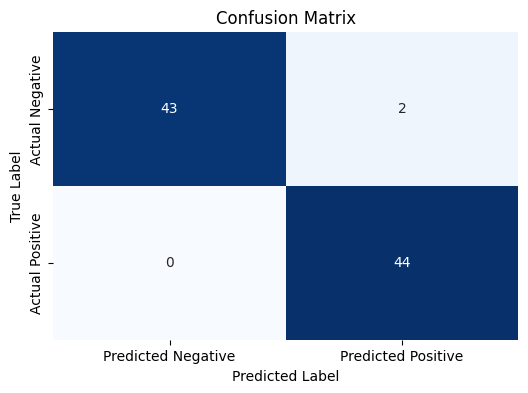

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix into a DataFrame for easier visualization
cm_df = pd.DataFrame(cm, columns=["Predicted Negative", "Predicted Positive"],
                     index=["Actual Negative", "Actual Positive"])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


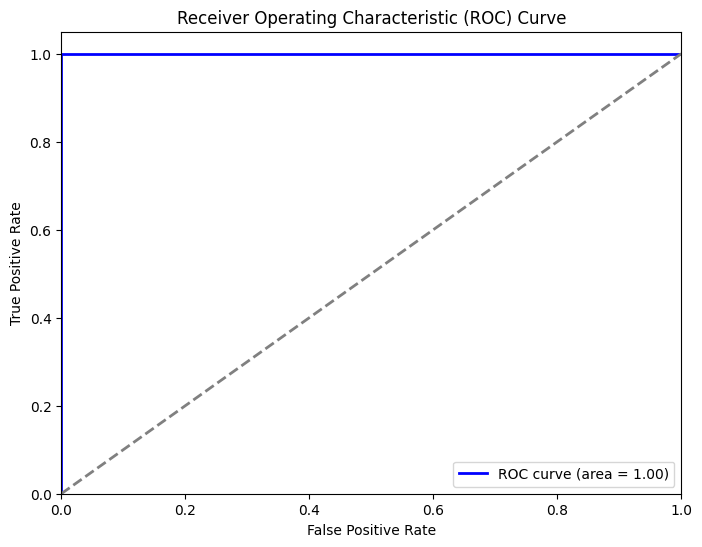

In [16]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


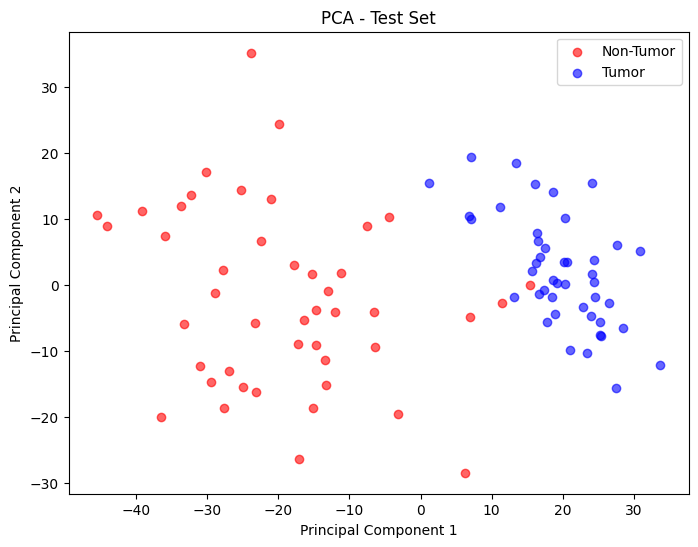

In [17]:
from sklearn.decomposition import PCA

# Perform PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y_test == 0, 0], X_pca[y_test == 0, 1], color='red', label='Non-Tumor', alpha=0.6)
plt.scatter(X_pca[y_test == 1, 0], X_pca[y_test == 1, 1], color='blue', label='Tumor', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Test Set')
plt.legend(loc='best')
plt.show()


In [18]:
import numpy as np
import pandas as pd

# Get the absolute values of the coefficients for feature importance
importance = np.abs(model.coef_[0])

# Create a DataFrame to view the features and their importance
feature_importance_df = pd.DataFrame({
    'Gene_ID': data_scaled['Gene_ID'],
    'Importance': importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top 10 most important genes
print("Top 10 most important genes based on Logistic Regression:")
print(feature_importance_df.head(10))


Top 10 most important genes based on Logistic Regression:
           Gene_ID  Importance
1436     201909_at    0.100966
13596  214218_s_at    0.100685
21087  221728_x_at    0.096246
4526     205000_at    0.086702
19854    220491_at    0.077093
6225   206700_s_at    0.074784
8609   209116_x_at    0.072355
8950   209458_x_at    0.070449
11144  211745_x_at    0.069775
11099  211699_x_at    0.068202


In [19]:
import pickle
with open('tumor_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


In [21]:
# Select the first sample (row 0)
sample = features_transposed[0].tolist()

# Confirm size
print(len(sample))  # Should print 22269


22269


In [22]:
formatted = ', '.join(map(str, sample))
print(formatted)


0.8200095896189536, -0.2788653370131861, 0.7701280760954273, 0.1789580593859122, -0.9979493339463974, 0.5933203350912446, -0.8809006338961425, -0.9100393398158262, -0.6690276705140354, -0.6843378380311574, -0.8749741174379018, 0.7953157710429501, 0.029807395186852995, 0.2066151361910358, -0.2684939332112648, 0.6585120161318933, -0.9243617545899082, -0.33121623239431264, 0.20118249610431502, -0.36529370202919703, 1.232396359838206, 1.7554114372779521, 1.759362448250113, 3.178763139998773, 2.7732906389808014, 1.8077623326590786, 2.746621314918718, 2.623646098410223, 0.6190019064102882, 2.3727569016780308, 2.6162379528374218, 1.2926492771636537, 3.279020043417346, 2.7194581144851147, 1.7084931819835467, 2.104582031942637, 2.6987153068812724, 3.199505947602616, 2.8923148445171365, 3.135302019305008, 1.3938939333252667, 3.503239916087454, 2.6033971671779, 2.1840961277573667, 2.7179764853705546, 3.131844884704368, 3.299762851021189, 2.5436381262239727, 2.12927585051864, 3.240003810067261, 3.